## This notebook will be geared solely towards foreign vs domestic gross
This is the first foray into the custom, combined dataset we have compiled

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../data/profit_data.csv')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# creating custom columns
df['foreign_gross'] = df.worldwide_gross - df.domestic_gross
df['total_profit'] = df['worldwide_gross'] - df['production_budget']
df['domestic_profit'] = df['domestic_gross'] - df['production_budget']
df['foreign_profit'] = df['foreign_gross'] - df['production_budget']
df['rev2bud_dom'] = df.domestic_gross/df.production_budget
df['rev2bud_for'] = df.foreign_gross/df.production_budget
df['rev2bud_wld'] = df.worldwide_gross/df.production_budget
df['primary_genre'] = df.genres.str.split(',', n = 1, expand = True)[0]
df['secondary_genre'] = df.genres.str.split(',', n = 1, expand = True)[1]

In [5]:
# follows the same trend, creating dataframes based on genre
horror_df = df[(df['primary_genre'] == 'Horror')]
action_df = df[(df['primary_genre'] == 'Action')]
drama_df = df[(df['primary_genre'] == 'Drama')]
advent_df = df[df['primary_genre'] == 'Adventure']
comedy_df = df[(df['primary_genre'] == 'Comedy')]
bio_df = df[(df['primary_genre'] == 'Biography')]

## Look at films that grossed much more overseas than they did domestic
Is there a pattern in the findings?
Will there be a standout according to genre?

In [7]:
oversea_df = df[(df.worldwide_gross_z) >= (3 * df.domestic_gross_z)]


In [8]:
oversea_df.sort_values(by = 'worldwide_gross_z', ascending = False)


,Unnamed: 0,popularity,vote_count,id_x,adult,original_language,title,vote_average,overview,MPAA,year,month,studio,production_budget,domestic_gross,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,avg_rating_imdb,num_votes_imdb,actors,directors,producers,editors,writers,primary_genre,secondary_genre,new_genre,worldwide_gross_z,domestic_gross_z,foreign_gross,total_profit,domestic_profit,foreign_profit,rev2bud_dom,rev2bud_for,rev2bud_wld
331,549,27.971,4819,68735,False,en,warcraft,6.3,The peaceful realm of Azeroth stands on the br...,PG-13,2016,5,Uni.,160.00,47.23,425.52,tt0803096,warcraft,Warcraft,2016,123.0,"Action,Adventure,Fantasy",6.9,225557,"Dominic Cooper,Paula Patton,Travis Fimmel,Ben ...",Duncan Jones,"Jon Jashni,Charles Roven,Stuart Fenegan,Alex G...",NaN,Charles Leavitt,Action,"Adventure,Fantasy",Action,1.018553,-0.252010,378.29,265.52,-112.77,218.29,0.295187,2.364312,2.659500
818,1755,12.328,5249,282035,False,en,the mummy,5.5,Though safely entombed in a crypt deep beneath...,PG-13,2017,6,NaN,195.00,80.10,409.95,tt2345759,the mummy,The Mummy,2017,110.0,"Action,Adventure,Fantasy",5.5,154345,"Russell Crowe,Tom Cruise,Sofia Boutella,Annabe...",Alex Kurtzman,NaN,NaN,"David Koepp,Christopher McQuarrie,Jon Spaihts,...",Action,"Adventure,Fantasy",Action,0.955653,0.116577,329.85,214.95,-114.90,134.85,0.410769,1.691538,2.102308
1058,2613,46.643,5254,399579,False,en,alita: battle angel,7.0,When Alita awakens with no memory of who she i...,PG-13,2019,1,NaN,170.00,85.71,402.98,tt0437086,alita: battle angel,Alita: Battle Angel,2019,122.0,"Action,Adventure,Sci-Fi",7.5,88207,"Mahershala Ali,Jennifer Connelly,Christoph Wal...",Robert Rodriguez,Jon Landau,NaN,"James Cameron,Laeta Kalogridis,Yukito Kishiro",Action,"Adventure,Sci-Fi",Action,0.927496,0.179484,317.27,232.98,-84.29,147.27,0.504176,1.866294,2.370471
811,1743,18.246,3006,278154,False,en,ice age: collision course,6.0,"Set after the events of Continental Drift, Scr...",PG,2016,6,Fox,105.00,64.06,402.16,tt3416828,ice age: collision course,Ice Age: Collision Course,2016,94.0,"Adventure,Animation,Comedy",5.7,48932,"John Leguizamo,Ray Romano,Denis Leary,Chris Wedge","Mike Thurmeier,Galen T. Chu",NaN,NaN,"Michael Berg,Yoni Brenner,Aubrey Solomon,Micha...",Adventure,"Animation,Comedy",Animation,0.924183,-0.063287,338.10,297.16,-40.94,233.10,0.610095,3.220000,3.830095
21,31,19.483,3796,17578,False,en,the adventures of tintin,6.8,"Intrepid young reporter, Tintin, and his loyal...",PG,2011,10,Par.,130.00,77.59,373.99,tt0983193,the adventures of tintin,The Adventures of Tintin,2011,107.0,"Action,Adventure,Animation",7.3,202430,"Jamie Bell,Andy Serkis,Simon Pegg,Daniel Craig",Steven Spielberg,Peter Jackson,NaN,"Edgar Wright,Hergé,Steven Moffat,Joe Cornish",Action,"Adventure,Animation",Action,0.810383,0.088431,296.40,243.99,-52.41,166.40,0.596846,2.280000,2.876846
792,1697,24.703,2781,270946,False,en,penguins of madagascar,6.5,"Skipper, Kowalski, Rico and Private join force...",PG,2014,11,Fox,132.00,83.35,366.94,tt1911658,penguins of madagascar,Penguins of Madagascar,2014,92.0,"Adventure,Animation,Comedy",6.7,72551,"Tom McGrath,Conrad Vernon,Christopher Knights,...","Eric Darnell,Simon J. Smith",NaN,NaN,"Alan Schoolcraft,Michael Colton,John Aboud,Bra...",Adventure,"Animation,Comedy",Animation,0.781902,0.153021,283.59,234.94,-48.65,151.59,0.631439,2.148409,2.779848
392,678,16.414,1460,77931,False,en,the smurfs 2,5.7,The evil wizard Gargamel creates a couple of m...,PG,2013,7,Sony,110.00,71.02,348.55,tt2017020,the smurfs 2,The Smurfs 2,2013,105.0,"Adventure,Animation,Comedy",5.4,34229,"Neil Patrick Harris,Katy Perry,Hank Azaria,Jay...",Raja Gosnell,NaN,NaN,"David Ronn,Jay Scherick,J. David Stem,David N....",Adventure,"Animation,Comedy",Animation,0.707611,0.014758,277.53,238.55,-38.98,167.53,0.645636,2.523000,3.168636
193,291,23.841,2888,47971,False,en,xxx: return of xander cage,5.6,Extreme athlete turned government operative Xa...,PG-13,2017,1,NaN,85.00,4

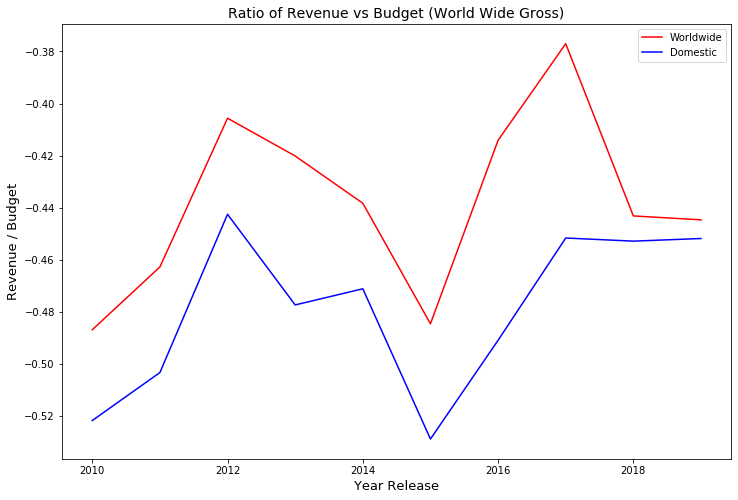

In [9]:

y1 = oversea_df.groupby(['year'])['worldwide_gross_z'].mean()
x1 = y1.index

y2 = oversea_df.groupby(['year'])['domestic_gross_z'].mean()
x2 = y2.index

plt.figure(figsize = (12,8))

plt.plot(x1, y1, 'r', label = 'Worldwide') # plotting Horror separately 
plt.plot(x2, y2, 'b', label = 'Domestic') # plotting Drama separately 

plt.legend()

plt.title('Ratio of Revenue vs Budget (World Wide Gross)', fontsize = 14)
plt.ylabel('Revenue / Budget', fontsize = 13)
plt.xlabel('Year Release', fontsize = 13)
plt.show()

#### Creating the necessary parameters so that we can form a boxplot for each genre vs worldwide gross

In [10]:
dat = oversea_df[oversea_df.primary_genre.apply(lambda x: x in ['Action', 'Comedy', 'Drama', 'Adventure', 'Biography', 'Horror', 'A'])]
dat = dat[['primary_genre', 'worldwide_gross']]
#dat = dat.sort_values(by = 'worldwide_gross_z', ascending = False).head(10)
dat.info

<bound method DataFrame.info of      primary_genre  worldwide_gross
4            Drama           142.63
5            Drama            61.72
13           Drama            77.74
14          Comedy             8.59
16           Drama            65.53
19           Drama            82.92
21          Action           373.99
26          Action            11.02
28          Action            48.06
29          Action            67.65
32          Action            97.52
33          Comedy           112.61
34          Action            91.13
35          Comedy            65.97
37           Drama            56.51
38          Action            46.75
40          Action            97.53
41          Comedy            21.54
42          Action            89.76
43          Action            46.37
44          Action            55.91
45          Action             7.89
48          Comedy            32.62
49           Drama            21.27
50          Action            53.14
52          Action           217

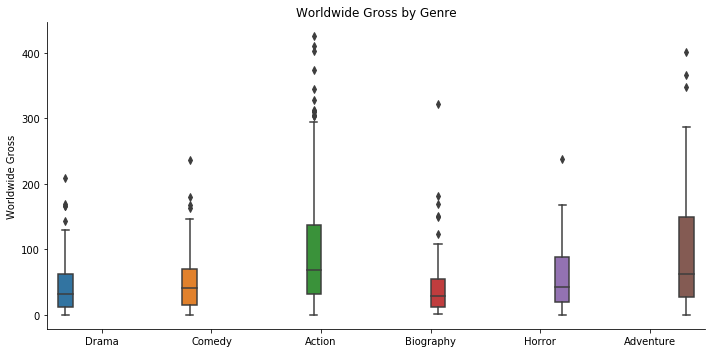

In [11]:
g = sns.catplot(x="primary_genre", y="worldwide_gross", hue="primary_genre", data=dat, kind = 'box', aspect = 2)
g.set(title = "Worldwide Gross by Genre", xlabel = "", ylabel = "Worldwide Gross")

plt.show()

#### Creating a boxplot graph fo all movies by year vs normalized gross

In [70]:
dat = oversea_df[oversea_df.primary_genre.apply(lambda x: x in ['Action', 'Comedy', 'Drama', 'Adventure', 'Biography', 'Horror', 'Crime'])]
dat = dat[['year', 'worldwide_gross_z']]
#dat = dat[['primary_genre', 'worldwide_gross_z']]
#dat = dat.sort_values(by = 'worldwide_gross_z', ascending = False).head(10)

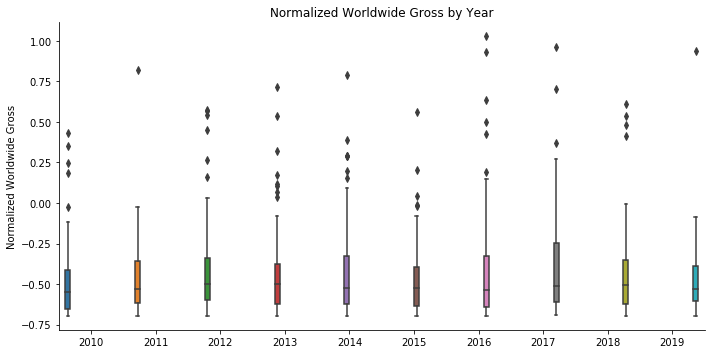

In [72]:

g = sns.catplot(x="year", y="worldwide_gross_z", hue="year", data=dat, kind = 'box', aspect = 2)
g.set(title = "Normalized Worldwide Gross by Year", xlabel = "", ylabel = "Normalized Worldwide Gross")

plt.show()